# importing librarys
**librarys for prediction will be mentioned in its place

In [9]:
import seaborn as sb
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split

# loading data

In [3]:
data=pd.read_csv("Desktop/Ad-Click-Prediction-master/advertising.csv")
data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

# Preprocessing

I removed add topic lines because converting them to numeric  would not be useful because they are not catagorical 

******let me know if you have any good ideas for this part

In [8]:
data=data.drop("Ad Topic Line",axis=1)
data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

             City  Male     Country            Timestamp  Clicked on Ad  
0     Wrightburgh     0     Tunisia  2016-03-27 00:53:11              0  
1       West Jodi     1       Nauru  2016-04-04 01:39:02              0  
2        Davidton     0  San Marino  2016-03-13 20:35:42              0  
3  West Terrifurt     1       Italy  2016-01-10 02:31:19              0  
4    South Manuel     0     Iceland  2016-06-03 03:36:18              0

here I tried to plot missing values 

<AxesSubplot:>

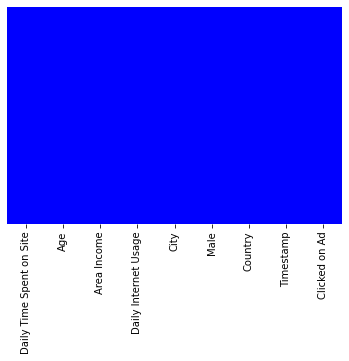

In [11]:
sb.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="winter")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   City                      1000 non-null   object 
 5   Male                      1000 non-null   int64  
 6   Country                   1000 non-null   object 
 7   Timestamp                 1000 non-null   object 
 8   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 58.7+ KB


In [22]:
data=data.drop("Timestamp",axis=1)
data=data.drop(["City","Country"],axis=1)

I tryed to make a usuall split for my data here

In [23]:
x=data.drop("Clicked on Ad",axis=1)
y=data["Clicked on Ad"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# FIRST: DecisionTreeClassifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtc=DecisionTreeClassifier()

In [24]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
dtc_predictoin=dtc.predict(X_test)

In [26]:
print(metrics.confusion_matrix(dtc_predictoin,y_test))
print(metrics.classification_report(dtc_predictoin,y_test))

[[152  11]
 [ 10 157]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       163
           1       0.93      0.94      0.94       167

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330



# SECOND: RandomForestClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rfc=RandomForestClassifier(n_estimators=100)

In [63]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
rfc_prediction=rfc.predict(X_test)

In [65]:
print(metrics.confusion_matrix(rfc_prediction,y_test))
print(metrics.classification_report(rfc_prediction,y_test))

[[156  10]
 [  6 158]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       166
           1       0.94      0.96      0.95       164

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



**here I tried to find a better estimetor for my random forest 

ps:I could use gride search instead but I did not :)

pps:It is an ordinary project so I tested small range of numbers if you want you can make it a larger range

In [72]:
#now lets se if we could find a better n_estimator
error_rate=[]
for x in range(50,500,50):
    rfc=RandomForestClassifier(n_estimators=x)
    rfc.fit(X_train,y_train)
    err=rfc.predict(X_test)
    error_rate.append(np.mean(err!=y_test))

C:\Users\mahyar_fardin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

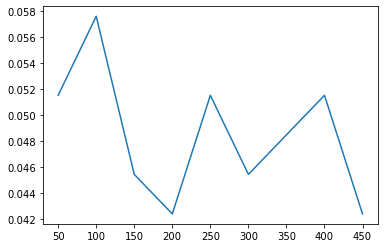

In [74]:
length=range(50,500,50)
sb.lineplot(length,error_rate)

As a summry for this small project we can find that both our random forest and decision tree acted well with around 94.5 precent of accuracy rate without any optimization


with a small optimization range in decision tree we can lower oure error rate to 4 percent 


I have to add that even the lowest accuracy that we got (94) would do good but who says no for 96 precent :)